In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_columns", None)

In [2]:
current_dir = os.getcwd()
data_folder = os.path.join(current_dir, "data")

In [3]:
train_data = pd.read_csv(os.path.join(data_folder, "churn-bigml-80.csv"))
train_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [4]:
train_data["Churn"].unique()

array([False,  True])

In [5]:
states = train_data["State"].unique()
print(len(states))
states

51


array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [6]:
train_data["Area code"].unique()

array([415, 408, 510])

In [7]:
train_data["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
train_data["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
train_encoded = train_data.copy()
train_encoded["Area code"] = train_encoded["Area code"].astype(str)  
train_encoded["Churn"] = train_encoded["Churn"].apply(lambda x: 1 if x else 0)
train_encoded = pd.get_dummies(train_encoded, drop_first=True)
train_encoded

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2662,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2663,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2664,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
num_cols = train_encoded.select_dtypes(include=[np.number]).columns.drop("Churn")
print(len(num_cols))
num_cols

69


Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
       'State_W

In [11]:
scaler = StandardScaler()
train_encoded[num_cols] = scaler.fit_transform(train_encoded[num_cols])
train_encoded

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,0.692163,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,7.090080,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,1.623917
1,0.161278,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,6.276459,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,1.623917
2,0.919686,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,7.233257,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,-0.615795
3,-0.420168,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,6.276459,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,-0.988810,-0.584569,2.978938,-0.615795
4,-0.647691,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.1295

In [12]:
correlation_matrix = train_encoded.corr()
churn_correlation = correlation_matrix["Churn"].sort_values(ascending=False)
print("Correlation with Churn:")
print(churn_correlation)

Correlation with Churn:
Churn                     1.000000
International plan_Yes    0.277489
Customer service calls    0.202590
Total day charge          0.195689
Total day minutes         0.195688
                            ...   
State_HI                 -0.036765
State_VA                 -0.039081
Total intl calls         -0.069882
Number vmail messages    -0.086474
Voice mail plan_Yes      -0.099291
Name: Churn, Length: 70, dtype: float64


In [13]:
input_features = train_encoded.drop(columns=["Churn"])
correlation_matrix = input_features.corr()

print("Correlation Matrix (between input features):")
correlation_matrix

Correlation Matrix (between input features):


,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
Account length,1.000000,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,-0.010188,-0.018458,0.008250,-0.000391,0.005182,-0.023438,0.017378,-0.002398,0.033286,0.000113,0.014640,-0.018605,0.007489,0.001331,0.004476,0.016370,-0.023537,0.027932,-0.034097,0.001584,-0.002499,0.003056,0.012073,0.010824,0.008859,-0.037762,0.009936,0.021041,-0.000656,0.005595,-0.005803,0.019850,0.014659,-0.017754,-0.008174,0.035432,-0.002923,0.005148,-0.013677,-0.029467,0.021433,-0.032553,-0.030161,-0.002763,0.021230,0.012432,0.008645,-0.014259,-0.028746,0.019166,0.004520,-0.008603,0.024500,0.002448
Number vmail messages,-0.002996,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.014977,-0.023251,0.009846,0.016480,0.001820,-0.018601,0.010916,-0.007869,0.015617,0.030354,0.006499,-0.004610,0.025520,-0.011763,-0.008056,-0.009393,-0.002174,0.001995,0.005953,-0.003030,-0.004733,-0.011574,0.008700,-0.000626,0.015536,0.021491,0.014949,0.038732,0.014125,-0.013113,0.016438,-0.018595,-0.018308,-0.011097,0.029190,0.002565,-0.024568,0.001962,-0.005606,0.003475,0.013529,-0.006023,-0.018458,0.012765,-0.016104,-0.016241,-0.038355,0.001967,0.013126,-0.011607,0.012807,-0.001567,0.005858,0.957159
Total day minutes,0.002847,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.026136,-0.011829,-0.013859,0.002289,0.000089,-0.014434,-0.028391,-0.015321,-0.002398,0.017688,-0.016208,0.006078,-0.013627,-0.023013,0.046287,0.043450,-0.009543,-0.016760,-0.007028,0.053565,0.007512,-0.001207,0.000385,-0.024173,-0.015074,-0.015653,0.016246,0.016144,-0.002722,-0.004626,0.050006,-0.013856,-0.004887,-0.020282,0.015309,0.001349,-0.025923,0.036112,-0.013018,-0.042800,0.030100,0.007758,0.004149,0.011441,-0.001210,0.009906,-0.010041,-0.010464,-0.025461,0.001337,0.039307,-0.025226,0.049550,0.013438
Total day calls,0.038862,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,-0.006943,0.027301,0.007437,0.001700,-0.040867,-0.012797,-0.015584,-0.012307,-0.007828,0.029456,0.004471,0.022994,0.056494,0.004814,0.039605,-0.000018,-0.007798,0.015359,0.009211,-0.018806,0.001369,-0.009134,-0.011587,-0.002990,0.014272,-0.035692,0.020631,0.001967,-0.036857,0.005015,-0.006573,0.008891,0.015324,-0.009178,-0.004164,-0.003547,-0.044364,-0.008321,0.003827,0.008636,-0.043765,-0.004075,0.006726,-0.004760,0.044994,0.005361,0.001427,-0.025347,0.038735,0.008157,-0.003936,-0.008901,-0.004277,-0.007541
Total day charge,0.002843,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.026124,-0.011833,-0.013863,0.002290,0.000094,-0.014437,-0.028387,-0.015315,-0.002390,0.017691,-0.016227,0.006085,-0.013628,-0.023002,0.046292,0.043451,-0.009538,-0.016764,-0.007034,0.053569,0.007520,-0.001217,0.000382,-0.024162,-0.015074,-0.015660,0.016245,0.016150,-0.002733,-0.004632,0.050000,-0.013863,-0.004886,-0.020271,0.015317,0.001344,-0.025916,0.036109,-0.0

In [14]:
# Set the diagonal values to NaN to exclude self-to-self correlations
np.fill_diagonal(correlation_matrix.values, np.nan)

# Mask the lower triangle of the correlation matrix
mask = np.tril(np.ones(correlation_matrix.shape)).astype(bool)
correlation_matrix = correlation_matrix.mask(mask)

# Find the pairs of features with the highest correlation values
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False).dropna()

# Display the top 10 highest correlated feature pairs
print("Top 10 highest correlated feature pairs:")
print(correlation_pairs.head(10))

Top 10 highest correlated feature pairs:
Total day charge        Total day minutes         1.000000
Total eve charge        Total eve minutes         1.000000
Total night charge      Total night minutes       0.999999
Total intl charge       Total intl minutes        0.999993
Voice mail plan_Yes     Number vmail messages     0.957159
International plan_Yes  State_IL                  0.071832
State_AR                Customer service calls    0.059910
State_ID                Total day calls           0.056494
Area code_510           State_ME                  0.054611
State_MD                Total day charge          0.053569
dtype: float64


# Unsupervised Learning

## 1. K-Means

In [15]:
X_train = train_encoded.drop(["Churn", "Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes", "Number vmail messages"], axis=1)
X_train

,Account length,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,0.692163,0.484868,1.579942,-0.050781,-0.058445,-0.469031,0.856707,-0.597527,-0.085681,-0.429172,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,7.090080,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,1.623917
1,0.161278,1.135375,-0.330194,0.147654,-0.095397,0.149054,1.049293,-0.597527,1.242921,-0.429172,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,6.276459,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,1.623917
2,0.919686,0.685024,1.179465,0.494917,-1.554963,0.200561,-0.758391,0.216894,0.698194,-1.191955,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,7.233257,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,-0.615795
3,-0.420168,-1.466653,2.212675,-0.596479,-2.718922,-0.572045,-0.084339,1.031314,-1.307995,0.333610,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,6.276459,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,-0.988810,-0.584569,2.978938,-0.615795
4,-0.647691,0.634985,-0.235772,1.090224,-1.021482,1.076181,-0.281303,-0.597527,-0.045823,1.096392,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,-0.159326,7.090080,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,2.978938,-0.615795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [16]:
# Finding the optimal number of clusters using the Elbow method and Silhouette score.
inertia_list = []
silhouette_list = []
K_range = range(2, 101)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=13)
    cluster_labels = kmeans.fit_predict(X_train)
    inertia_list.append(kmeans.inertia_)
    sil_score = silhouette_score(X_train, cluster_labels)
    silhouette_list.append(sil_score)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={sil_score:.3f}")

K=2: Inertia=167002.37, Silhouette Score=0.026
K=3: Inertia=164339.56, Silhouette Score=-0.005
K=4: Inertia=161703.82, Silhouette Score=0.033
K=5: Inertia=159017.68, Silhouette Score=0.035
K=6: Inertia=156832.51, Silhouette Score=0.056
K=7: Inertia=154209.80, Silhouette Score=0.035
K=8: Inertia=151139.57, Silhouette Score=0.073
K=9: Inertia=148428.06, Silhouette Score=0.025
K=10: Inertia=145770.84, Silhouette Score=0.073
K=11: Inertia=143219.90, Silhouette Score=0.056
K=12: Inertia=140437.03, Silhouette Score=0.089
K=13: Inertia=137765.06, Silhouette Score=0.109
K=14: Inertia=135016.95, Silhouette Score=0.091
K=15: Inertia=132289.70, Silhouette Score=0.136
K=16: Inertia=129510.86, Silhouette Score=0.121
K=17: Inertia=126829.57, Silhouette Score=0.157
K=18: Inertia=124076.14, Silhouette Score=0.140
K=19: Inertia=121327.41, Silhouette Score=0.153
K=20: Inertia=118588.17, Silhouette Score=0.167
K=21: Inertia=115852.85, Silhouette Score=0.178
K=22: Inertia=113187.41, Silhouette Score=0.181

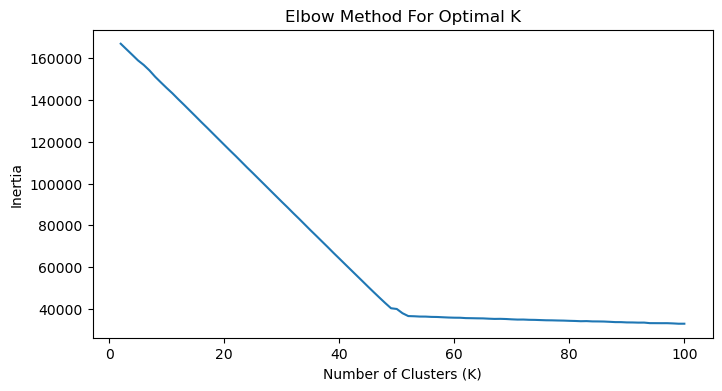

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia_list)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal K")
plt.show()

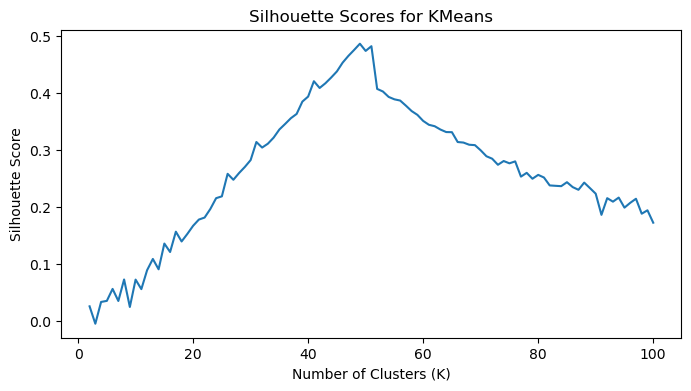

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_list)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for KMeans")
plt.show()

In [19]:
optimal_k = 49
kmeans = KMeans(n_clusters=optimal_k, random_state=13)
cluster_labels = kmeans.fit_predict(X_train)

train_encoded["kmeans_cluster"] = cluster_labels

grouped = train_encoded.groupby("kmeans_cluster")["Churn"]
total_members = grouped.count()
churn_yes_count = grouped.sum()
proportion_churn = churn_yes_count / total_members

cluster_summary = pd.DataFrame({
    "Cluster": total_members.index,
    "Total Members": total_members.values,
    "Churn Yes Count": churn_yes_count.values,
    "Proportion Churn Yes": proportion_churn.values
})
cluster_summary["Proportion Churn No"] = 1 - cluster_summary["Proportion Churn Yes"]

cluster_summary.sort_values(by="Proportion Churn Yes", ascending=False)

,Cluster,Total Members,Churn Yes Count,Proportion Churn Yes,Proportion Churn No
15,15,55,16,0.290909,0.709091
41,41,50,14,0.280000,0.720000
29,29,47,11,0.234043,0.765957
17,17,60,14,0.233333,0.766667
14,14,48,11,0.229167,0.770833
35,35,49,11,0.224490,0.775510
28,28,49,11,0.224490,0.775510
32,32,58,13,0.224138,0.775862
26,26,61,13,0.213115,0.786885
36,36,43,9,0.209302,0.790698


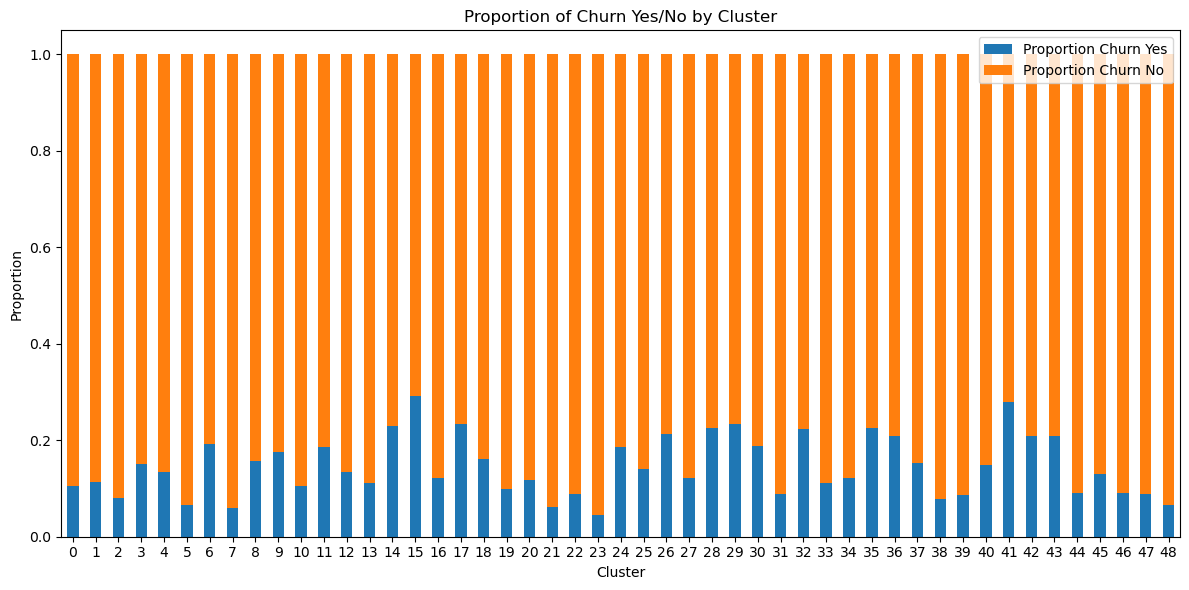

In [20]:
cluster_summary.sort_values("Cluster", inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))

cluster_summary.set_index("Cluster")[["Proportion Churn Yes", "Proportion Churn No"]].plot(
    kind="bar", 
    stacked=True, 
    ax=ax
)

ax.set_ylabel("Proportion")
ax.set_title("Proportion of Churn Yes/No by Cluster")
ax.legend(loc="upper right")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
train_encoded.groupby("kmeans_cluster").std()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.873351,0.935425,1.016613,1.206321,1.016622,0.952400,1.038005,0.952260,0.953344,1.025114,0.953486,0.970995,0.975018,0.970954,1.184563,0.309620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.007555,1.040511,0.945998,0.948110
1,1.142014,0.930259,0.981622,0.921232,0.981641,0.877382,0.783852,0.877441,1.076518,1.090284,1.076610,0.911585,0.898407,0.910887,0.968179,0.319058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.006127,1.012522,0.987970,0.892087
2,0.971546,1.101083,0.975657,1.062301,0.975670,1.027877,0.941509,1.027856,1.003374,0.884264,1.003438,0.976349,0.974869,0.976380,0.955886,0.272139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.004755,1.064565,0.771717,1.015855
3,0.793667,1.119259,1.075325,1.017898,1.075287,0.996011,0.920423,0.996061,1.016956,0.886578,1.016826,1.173605,0.854556,1.173917,0.969410,0.361298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.007264,0.969233,1.146212,1.075379
4,1.080136,1.101710,1.016610,1.038877,1.016663,1.046509,1.183427,1.046548,1.018109,1.066045,1.018108,0.949712,0.915449,0.949209,0.895589,0.342803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.006259,1.042998,0.923846,1.035027
5,0.929531,1.049101,1.086795,1.018102,1.086761,1.050906,1.047140,1.051032,1.146614,0.887580,1.146333,0.875310,0.892457,0.875353,0.824285,0.249590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.007143,0.996576,0.995294,1.012517
6,0.916201,0.943396,1.108627,0.886335,1.108589,0.938017,0.974449,0.938230,0.967669,1.079562,0.968153,1.148913,1.019652,1.149439,0.861010,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.009073,1.087171,0.986693,0.979286
7,1.014530,0.939880,0.885349,0.959983,0.885271,0.899011,1.068167,0.898979,1.179871,1.005983,1.179650,0.995608,1.003454,0.995712,0.951311,0.238721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.993938,1.006

In [22]:
grouped_means = train_encoded.groupby("kmeans_cluster").mean()
results = []

for cluster, row in grouped_means.iterrows():
    for col, value in row.iteritems():
        if col.startswith("State_") and value >= 0:
            state_name = col.replace("State_", "")
            results.append({"Cluster": cluster, "State": state_name, "Mean Value": value})

df_results = pd.DataFrame(results)
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(df_results)

    Cluster State  Mean Value
0         0    VT    6.765496
1         1    OR    6.480741
2         2    WV    5.412528
3         3    OH    6.276459
4         4    UT    6.590397
5         5    WI    6.534900
6         6    KS    7.090080
7         7    VA    6.228246
8         8    DE    7.160622
9         9    NY    6.181091
10       10    AL    6.276459
11       11    MN    6.089804
12       12    OK    7.090080
13       13    IN    6.954881
14       14    MS    7.385233
15       15    TX    6.890046
16       16    WY    6.276459
17       17    MD    6.590397
18       18    NC    6.826942
19       19    MO    7.160622
20       20    CO    6.647288
21       21    RI    7.385233
22       22    ID    6.826942
23       23    HI    7.719515
24       24    CT    6.647288
25       25    KY    7.810250
26       26    NV    6.534900
27       27    SD    7.308089
28       28    SC    7.308089
29       29    AR    7.464811
30       30    MT    7.021530
31       31    NE    7.631805
32       3

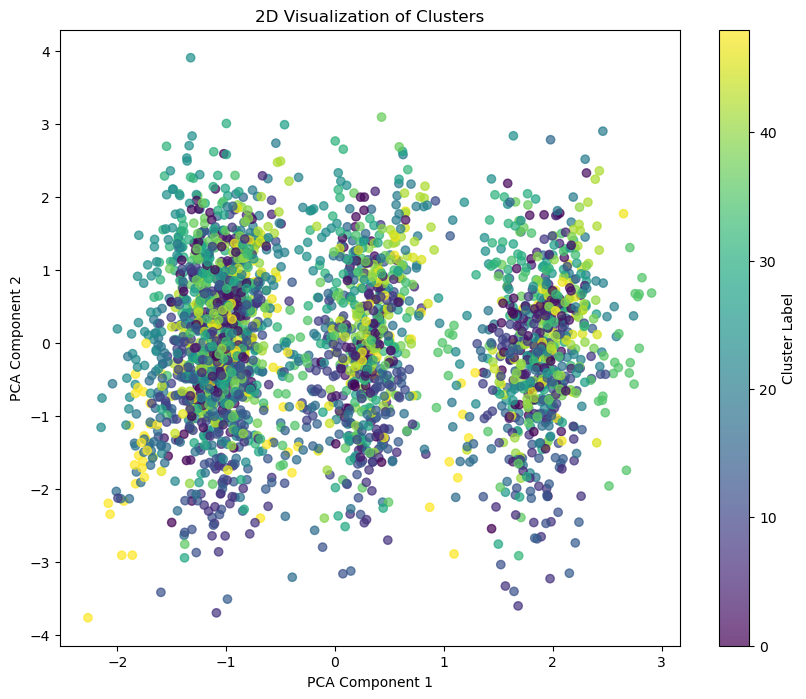

In [23]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap="viridis", alpha=0.7)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of Clusters")
plt.colorbar(scatter, label="Cluster Label")
plt.show()

### Without States and Area Codes

In [24]:
state_cols = [col for col in train_encoded.columns if col.startswith("State_")]
area_cols = [col for col in train_encoded.columns if col.startswith("Area code_")]

cols_to_drop = [
    "Churn",
    "Total day minutes",
    "Total eve minutes",
    "Total night minutes",
    "Total intl minutes",
    "Number vmail messages",
    "kmeans_cluster"
] + state_cols + area_cols

X_train = train_encoded.drop(cols_to_drop, axis=1)
X_train

,Account length,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,International plan_Yes,Voice mail plan_Yes
0,0.692163,0.484868,1.579942,-0.050781,-0.058445,-0.469031,0.856707,-0.597527,-0.085681,-0.429172,-0.335690,1.623917
1,0.161278,1.135375,-0.330194,0.147654,-0.095397,0.149054,1.049293,-0.597527,1.242921,-0.429172,-0.335690,1.623917
2,0.919686,0.685024,1.179465,0.494917,-1.554963,0.200561,-0.758391,0.216894,0.698194,-1.191955,-0.335690,-0.615795
3,-0.420168,-1.466653,2.212675,-0.596479,-2.718922,-0.572045,-0.084339,1.031314,-1.307995,0.333610,2.978938,-0.615795
4,-0.647691,0.634985,-0.235772,1.090224,-1.021482,1.076181,-0.281303,-0.597527,-0.045823,1.096392,2.978938,-0.615795
...,...,...,...,...,...,...,...,...,...,...,...,...
2661,-0.546569,-0.115600,-0.826178,-1.588658,-0.210869,1.436730,0.397126,0.216894,0.565334,0.333610,-0.335690,-0.615795
2662,2.310100,-1.166419,-0.430042,1.288660,0.297208,-0.881087,1.535136,0.624104,-0.125539,0.333610,-0.335690,1.623917
2663,-0.824652,-2.167199,0.952636,-2.233574,-0.922176,1.179195,-0.193763,-0.190317,-0.231828,1.096392,-0.335690,-0.615795
2664,-1.835863,0.434829,0.024701,-2.084747,1.735990,-0.469031,-0.180632,0.624104,1.389067,0.333610,-0.335690,-0.615795


In [25]:
# Finding the optimal number of clusters using the Elbow method and Silhouette score.
inertia_list = []
silhouette_list = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=13)
    cluster_labels = kmeans.fit_predict(X_train)
    inertia_list.append(kmeans.inertia_)
    sil_score = silhouette_score(X_train, cluster_labels)
    silhouette_list.append(sil_score)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={sil_score:.3f}")

K=2: Inertia=29303.16, Silhouette Score=0.203
K=3: Inertia=26902.99, Silhouette Score=0.121
K=4: Inertia=25654.36, Silhouette Score=0.085
K=5: Inertia=24698.52, Silhouette Score=0.081
K=6: Inertia=23857.95, Silhouette Score=0.082
K=7: Inertia=23197.03, Silhouette Score=0.077
K=8: Inertia=22722.35, Silhouette Score=0.072
K=9: Inertia=22223.20, Silhouette Score=0.072


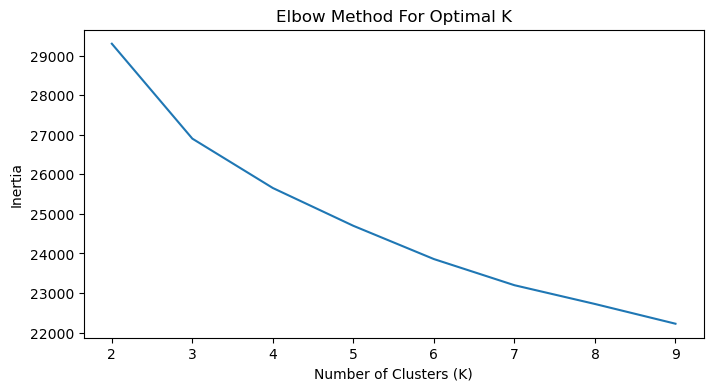

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia_list)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal K")
plt.show()

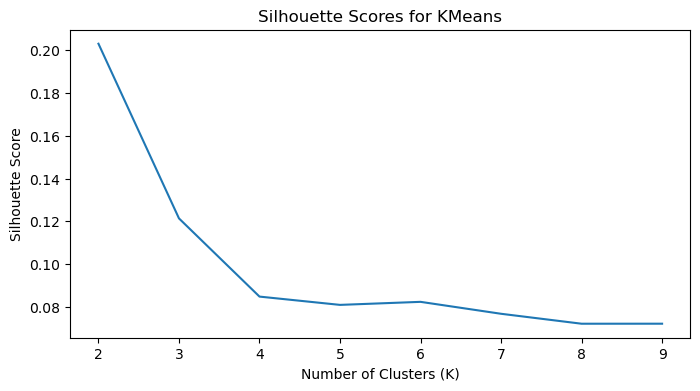

In [27]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_list)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for KMeans")
plt.show()

In [28]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=13)
cluster_labels = kmeans.fit_predict(X_train)

train_encoded["kmeans_cluster"] = cluster_labels

grouped = train_encoded.groupby("kmeans_cluster")["Churn"]
total_members = grouped.count()
churn_yes_count = grouped.sum()
proportion_churn = churn_yes_count / total_members

cluster_summary = pd.DataFrame({
    "Cluster": total_members.index,
    "Total Members": total_members.values,
    "Churn Yes Count": churn_yes_count.values,
    "Proportion Churn Yes": proportion_churn.values
})
cluster_summary["Proportion Churn No"] = 1 - cluster_summary["Proportion Churn Yes"]

cluster_summary.sort_values(by="Proportion Churn Yes", ascending=False)

,Cluster,Total Members,Churn Yes Count,Proportion Churn Yes,Proportion Churn No
0,0,270,118,0.437037,0.562963
1,1,2396,270,0.112688,0.887312


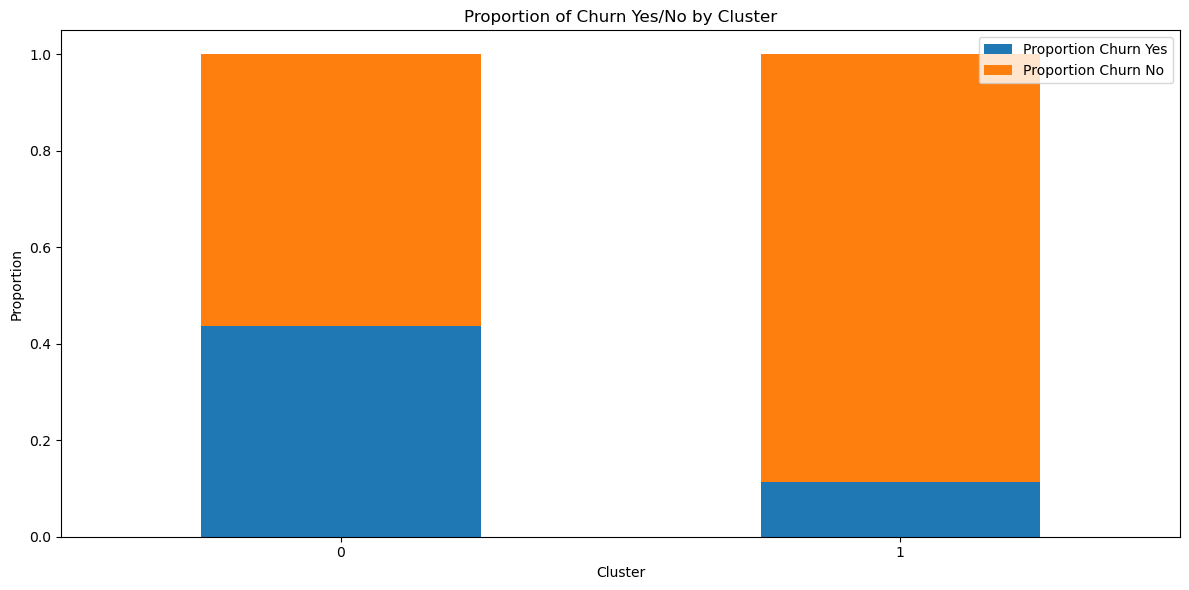

In [29]:
cluster_summary.sort_values("Cluster", inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))

cluster_summary.set_index("Cluster")[["Proportion Churn Yes", "Proportion Churn No"]].plot(
    kind="bar", 
    stacked=True, 
    ax=ax
)

ax.set_ylabel("Proportion")
ax.set_title("Proportion of Churn Yes/No by Cluster")
ax.legend(loc="upper right")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
for cluster, group in train_encoded.groupby("kmeans_cluster"):
    print(f"Cluster {cluster}:")
    
    for col in group.columns:
        if col not in cols_to_drop:
            mean_val = group[col].mean()
            std_val = group[col].std()
            min_val = group[col].min()
            max_val = group[col].max()
            
            print(f"  {col} summary: mean = {mean_val:.2f}, std = {std_val:.2f}, range = ({min_val:.2f}, {max_val:.2f})")
    
    print("------")

Cluster 0:
  Account length summary: mean = 0.07, std = 0.98, range = (-2.49, 3.12)
  Total day calls summary: mean = -0.01, std = 1.06, range = (-2.92, 2.04)
  Total day charge summary: mean = 0.15, std = 1.06, range = (-3.08, 3.09)
  Total eve calls summary: mean = 0.03, std = 0.93, range = (-2.08, 2.93)
  Total eve charge summary: mean = 0.08, std = 1.04, range = (-2.72, 3.20)
  Total night calls summary: mean = 0.05, std = 1.01, range = (-2.68, 2.78)
  Total night charge summary: mean = -0.03, std = 1.03, range = (-2.52, 2.98)
  Total intl calls summary: mean = 0.03, std = 1.10, range = (-1.41, 6.33)
  Total intl charge summary: mean = 0.16, std = 0.99, range = (-3.21, 3.50)
  Customer service calls summary: mean = -0.11, std = 1.03, range = (-1.19, 5.67)
  International plan_Yes summary: mean = 2.98, std = 0.00, range = (2.98, 2.98)
  Voice mail plan_Yes summary: mean = 0.01, std = 1.01, range = (-0.62, 1.62)
------
Cluster 1:
  Account length summary: mean = -0.01, std = 1.00, ra

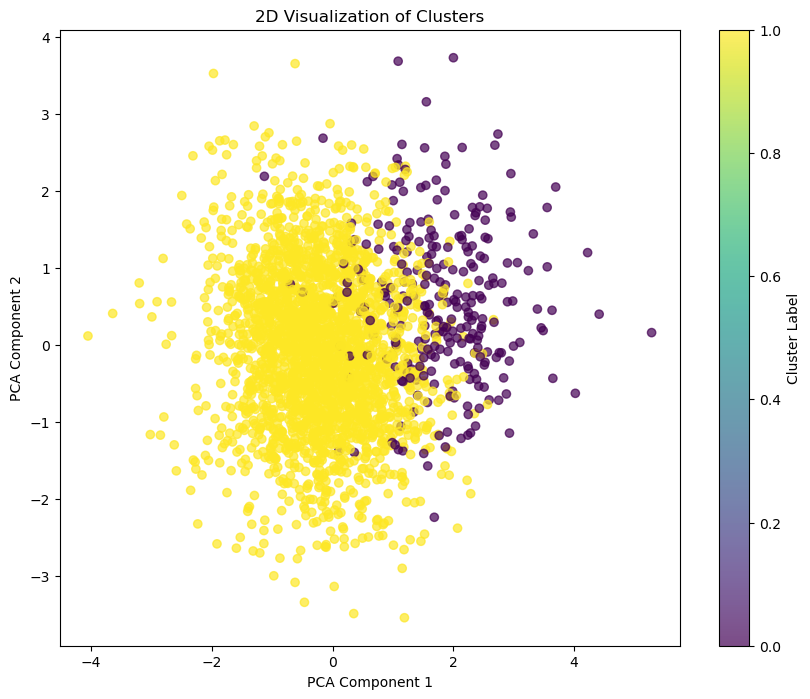

In [31]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap="viridis", alpha=0.7)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of Clusters")
plt.colorbar(scatter, label="Cluster Label")
plt.show()

## 2. DBSCAN

In [32]:
train_encoded = train_encoded.drop(["kmeans_cluster"], axis=1)
X_train = train_encoded.drop(["Churn", "Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes", "Number vmail messages"], axis=1)
X_train

,Account length,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,0.692163,0.484868,1.579942,-0.050781,-0.058445,-0.469031,0.856707,-0.597527,-0.085681,-0.429172,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,7.090080,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,1.623917
1,0.161278,1.135375,-0.330194,0.147654,-0.095397,0.149054,1.049293,-0.597527,1.242921,-0.429172,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,6.276459,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,1.623917
2,0.919686,0.685024,1.179465,0.494917,-1.554963,0.200561,-0.758391,0.216894,0.698194,-1.191955,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,7.233257,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,-0.615795
3,-0.420168,-1.466653,2.212675,-0.596479,-2.718922,-0.572045,-0.084339,1.031314,-1.307995,0.333610,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,6.276459,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,-0.988810,-0.584569,2.978938,-0.615795
4,-0.647691,0.634985,-0.235772,1.090224,-1.021482,1.076181,-0.281303,-0.597527,-0.045823,1.096392,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,-0.159326,7.090080,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,2.978938,-0.615795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [33]:
eps_range = np.linspace(3.0, 5.0, 20)
min_samples_range = range(10, 20)

best_score = -1
best_params = {}

print("Grid search for DBSCAN hyperparameters:")

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters < 2:
            continue
            
        score = silhouette_score(X_train, labels)
        if score < 0:
            continue
        
        print(f"eps={eps:.2f}, min_samples={min_samples} -> Clusters: {n_clusters}, Silhouette Score: {score:.3f}")
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples, 'silhouette_score': score}

best_params

Grid search for DBSCAN hyperparameters:
eps=3.74, min_samples=10 -> Clusters: 54, Silhouette Score: 0.033
eps=3.74, min_samples=12 -> Clusters: 42, Silhouette Score: 0.034
eps=3.74, min_samples=13 -> Clusters: 37, Silhouette Score: 0.031
eps=3.74, min_samples=14 -> Clusters: 33, Silhouette Score: 0.006
eps=3.84, min_samples=10 -> Clusters: 52, Silhouette Score: 0.134
eps=3.84, min_samples=11 -> Clusters: 50, Silhouette Score: 0.086
eps=3.84, min_samples=12 -> Clusters: 49, Silhouette Score: 0.058
eps=3.84, min_samples=13 -> Clusters: 48, Silhouette Score: 0.023
eps=3.84, min_samples=14 -> Clusters: 42, Silhouette Score: 0.073
eps=3.84, min_samples=15 -> Clusters: 35, Silhouette Score: 0.064
eps=3.84, min_samples=16 -> Clusters: 33, Silhouette Score: 0.040
eps=3.84, min_samples=17 -> Clusters: 33, Silhouette Score: 0.027
eps=3.84, min_samples=18 -> Clusters: 29, Silhouette Score: 0.010
eps=3.95, min_samples=10 -> Clusters: 51, Silhouette Score: 0.201
eps=3.95, min_samples=11 -> Clusters

{'eps': 5.0, 'min_samples': 10, 'silhouette_score': 0.4074570590351415}

In [34]:
optimal_eps = 5
optimal_min_samples = 10

dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan.fit_predict(X_train)

train_encoded["dbscan_cluster"] = dbscan_labels

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"DBSCAN identified {n_clusters} clusters and {n_noise} noise points.")

DBSCAN identified 51 clusters and 29 noise points.


In [35]:
grouped = train_encoded.groupby("dbscan_cluster")["Churn"]
total_members = grouped.count()
churn_yes_count = grouped.sum()
proportion_churn = churn_yes_count / total_members

cluster_summary = pd.DataFrame({
    "Cluster": total_members.index,
    "Total Members": total_members.values,
    "Churn Yes Count": churn_yes_count.values,
    "Proportion Churn Yes": proportion_churn.values
})
cluster_summary["Proportion Churn No"] = 1 - cluster_summary["Proportion Churn Yes"]

cluster_summary.sort_values(by='Proportion Churn Yes', ascending=False)

,Cluster,Total Members,Churn Yes Count,Proportion Churn Yes,Proportion Churn No
0,-1,29,14,0.482759,0.517241
13,12,55,16,0.290909,0.709091
3,2,48,12,0.250000,0.750000
42,41,48,11,0.229167,0.770833
45,44,49,11,0.224490,0.775510
37,36,58,13,0.224138,0.775862
47,46,36,8,0.222222,0.777778
34,33,60,13,0.216667,0.783333
19,18,43,9,0.209302,0.790698
31,30,48,10,0.208333,0.791667


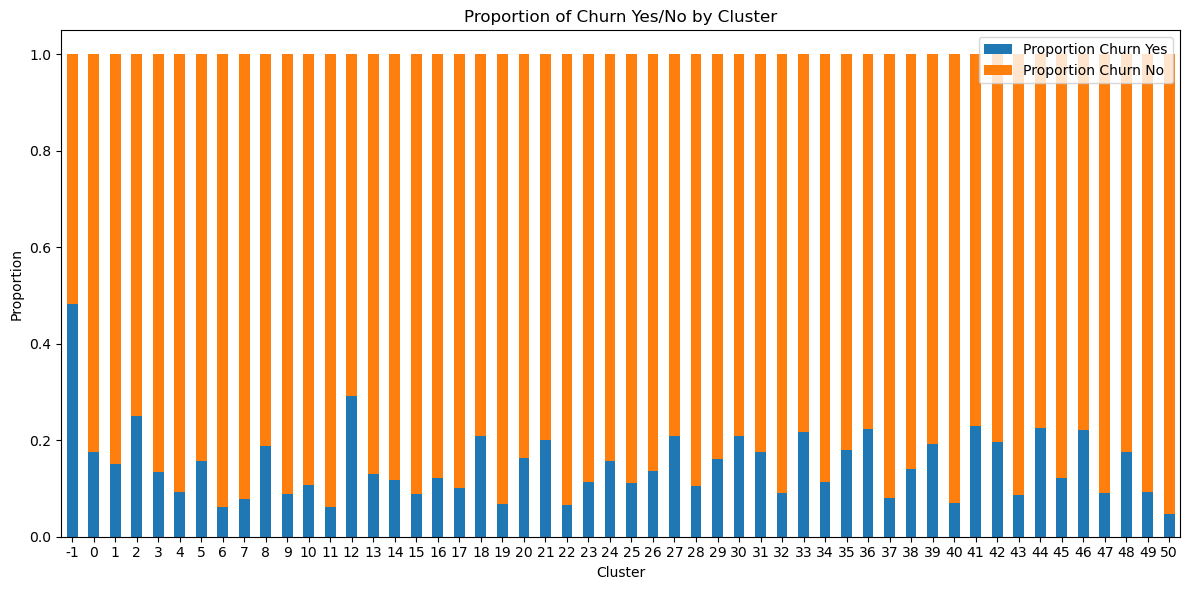

In [36]:
cluster_summary.sort_values("Cluster", inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))

cluster_summary.set_index("Cluster")[["Proportion Churn Yes", "Proportion Churn No"]].plot(
    kind="bar", 
    stacked=True, 
    ax=ax
)

ax.set_ylabel("Proportion")
ax.set_title("Proportion of Churn Yes/No by Cluster")
ax.legend(loc="upper right")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
train_encoded.groupby("dbscan_cluster").std()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
dbscan_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,1.114127,1.069852,1.403995,1.932130,1.403960,1.460136,1.490951,1.459941,1.093645,0.941600,1.094009,1.569705,2.266169,1.569369,1.980863,0.508548,1.195095,1.959577,1.441522,0.0,0.0,1.753002,1.441522,0.0,0.0,0.0,1.457533,0.0,0.0,1.441522,0.0,1.342786,0.0,0.0,1.342786,1.738666,1.919902,1.767711,1.612789,1.355627,0.0,0.0,0.0,1.457533,0.0,0.0,1.900969,0.0,1.241916,1.177842,0.0,0.0,0.0,0.0,0.0,0.0,1.382488,0.0,0.0,1.251983,1.186371,1.283768,0.0,0.0,0.0,0.0,0.941707,1.167234,1.603370,1.054509
0,0.901139,0.949854,1.049193,0.884026,1.049171,0.944955,0.968499,0.945179,0.965993,1.089827,0.966515,1.153825,1.018169,1.154389,0.854487,0.385013,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.008265,1.075599,0.900002,0.985793
1,0.793667,1.119259,1.075325,1.017898,1.075287,0.996011,0.920423,0.996061,1.016956,0.886578,1.016826,1.173605,0.854556,1.173917,0.969410,0.361298,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.007264,0.969233,1.146212,1.075379
2,0.963942,1.149441,0.794172,1.028242,0.794122,1.050997,1.005648,1.050931,1.111937,0.990407,1.111896,0.868610,0.929365,0.867992,0.980549,0.437595,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.010646,1.004381,1.023257,1.049120
3,1.116250,1.031463,1.148721,1.056900,1.148802,1.099494,0.982325,1.099452,0.986364,1.080441,0.986515,1.140344,1.216604,1.140631,1.002413,0.344642,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.006828,1.003560,0.986693,1.003139
4,1.059701,0.890367,0.905330,0.866826,0.905291,1.048782,1.032849,1.048870,0.858317,0.894824,0.858178,1.016057,1.022830,1.014728,1.103097,0.291712,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.007727,0.897446,0.966918,0.950991
5,0.915303,0.975068,0.937244,1.077370,0.937255,1.089188,0.936704,1.089197,1.094172,0.997155,1.094085,0.906339,0.826389,0.906366,0.831480,0.367290,0.000000,0.0000

In [38]:
grouped_means = train_encoded.groupby("dbscan_cluster").mean()
results = []

for cluster, row in grouped_means.iterrows():
    for col, value in row.iteritems():
        if col.startswith("State_") and value >= 0:
            state_name = col.replace("State_", "")
            results.append({"Cluster": cluster, "State": state_name, "Mean Value": value})

df_results = pd.DataFrame(results)
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(df_results)

    Cluster State  Mean Value
0        -1    AL    0.062598
1        -1    AR    0.390091
2        -1    AZ    0.136653
3        -1    CT    0.318371
4        -1    DC    0.136653
5        -1    HI    0.141115
6        -1    IL    0.136653
7        -1    KS    0.108307
8        -1    MA    0.108307
9        -1    MD    0.313239
10       -1    ME    0.376608
11       -1    MI    0.323614
12       -1    MN    0.267102
13       -1    MO    0.112081
14       -1    ND    0.141115
15       -1    NJ    0.370129
16       -1    NV    0.077594
17       -1    NY    0.056936
18       -1    SD    0.119887
19       -1    UT    0.080751
20       -1    VA    0.059745
21       -1    VT    0.090581
22        0    KS    7.090080
23        1    OH    6.276459
24        2    NJ    7.233257
25        3    OK    7.090080
26        4    AL    6.276459
27        5    MA    7.090080
28        6    RI    7.385233
29        7    IA    8.316123
30        8    MT    7.021530
31        9    ID    6.826942
32       1

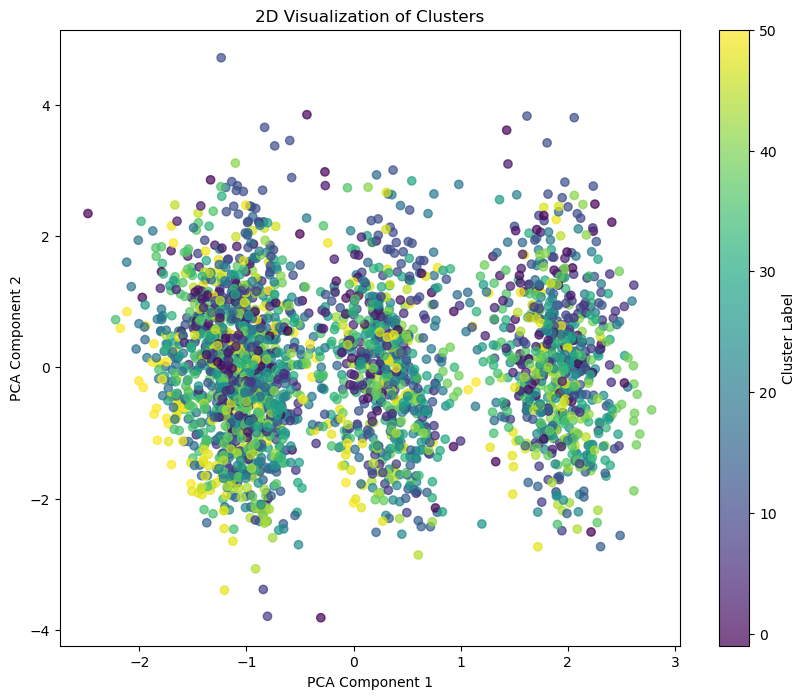

In [39]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_labels, cmap="viridis", alpha=0.7)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of Clusters")
plt.colorbar(scatter, label="Cluster Label")
plt.show()

### Without States and Area Codes

In [40]:
state_cols = [col for col in train_encoded.columns if col.startswith("State_")]
area_cols = [col for col in train_encoded.columns if col.startswith("Area code_")]

cols_to_drop = [
    "Churn",
    "Total day minutes",
    "Total eve minutes",
    "Total night minutes",
    "Total intl minutes",
    "Number vmail messages",
    "dbscan_cluster"
] + state_cols + area_cols

X_train = train_encoded.drop(cols_to_drop, axis=1)
X_train

,Account length,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,International plan_Yes,Voice mail plan_Yes
0,0.692163,0.484868,1.579942,-0.050781,-0.058445,-0.469031,0.856707,-0.597527,-0.085681,-0.429172,-0.335690,1.623917
1,0.161278,1.135375,-0.330194,0.147654,-0.095397,0.149054,1.049293,-0.597527,1.242921,-0.429172,-0.335690,1.623917
2,0.919686,0.685024,1.179465,0.494917,-1.554963,0.200561,-0.758391,0.216894,0.698194,-1.191955,-0.335690,-0.615795
3,-0.420168,-1.466653,2.212675,-0.596479,-2.718922,-0.572045,-0.084339,1.031314,-1.307995,0.333610,2.978938,-0.615795
4,-0.647691,0.634985,-0.235772,1.090224,-1.021482,1.076181,-0.281303,-0.597527,-0.045823,1.096392,2.978938,-0.615795
...,...,...,...,...,...,...,...,...,...,...,...,...
2661,-0.546569,-0.115600,-0.826178,-1.588658,-0.210869,1.436730,0.397126,0.216894,0.565334,0.333610,-0.335690,-0.615795
2662,2.310100,-1.166419,-0.430042,1.288660,0.297208,-0.881087,1.535136,0.624104,-0.125539,0.333610,-0.335690,1.623917
2663,-0.824652,-2.167199,0.952636,-2.233574,-0.922176,1.179195,-0.193763,-0.190317,-0.231828,1.096392,-0.335690,-0.615795
2664,-1.835863,0.434829,0.024701,-2.084747,1.735990,-0.469031,-0.180632,0.624104,1.389067,0.333610,-0.335690,-0.615795


In [41]:
eps_range = np.linspace(3.0, 5.0, 20)
min_samples_range = range(10, 20)

best_score = -1
best_params = {}

print("Grid search for DBSCAN hyperparameters:")

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters < 2:
            continue
            
        score = silhouette_score(X_train, labels)
        if score < 0:
            continue
        
        print(f"eps={eps:.2f}, min_samples={min_samples} -> Clusters: {n_clusters}, Silhouette Score: {score:.3f}")
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples, 'silhouette_score': score}

best_params

Grid search for DBSCAN hyperparameters:
eps=3.00, min_samples=10 -> Clusters: 2, Silhouette Score: 0.186
eps=3.00, min_samples=11 -> Clusters: 2, Silhouette Score: 0.185
eps=3.00, min_samples=12 -> Clusters: 2, Silhouette Score: 0.184
eps=3.00, min_samples=13 -> Clusters: 2, Silhouette Score: 0.184
eps=3.00, min_samples=14 -> Clusters: 2, Silhouette Score: 0.183
eps=3.00, min_samples=15 -> Clusters: 2, Silhouette Score: 0.183
eps=3.00, min_samples=16 -> Clusters: 2, Silhouette Score: 0.182
eps=3.00, min_samples=17 -> Clusters: 2, Silhouette Score: 0.181
eps=3.00, min_samples=18 -> Clusters: 2, Silhouette Score: 0.181
eps=3.00, min_samples=19 -> Clusters: 2, Silhouette Score: 0.180
eps=3.11, min_samples=10 -> Clusters: 2, Silhouette Score: 0.189
eps=3.11, min_samples=11 -> Clusters: 2, Silhouette Score: 0.189
eps=3.11, min_samples=12 -> Clusters: 2, Silhouette Score: 0.188
eps=3.11, min_samples=13 -> Clusters: 2, Silhouette Score: 0.188
eps=3.11, min_samples=14 -> Clusters: 2, Silhouett

{'eps': 3.4210526315789473,
 'min_samples': 10,
 'silhouette_score': 0.19825134467002517}

In [42]:
optimal_eps = 3.4210526315789473
optimal_min_samples = 10

dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan.fit_predict(X_train)

train_encoded["dbscan_cluster"] = dbscan_labels

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"DBSCAN identified {n_clusters} clusters and {n_noise} noise points.")

DBSCAN identified 2 clusters and 16 noise points.


In [43]:
grouped = train_encoded.groupby("dbscan_cluster")["Churn"]
total_members = grouped.count()
churn_yes_count = grouped.sum()
proportion_churn = churn_yes_count / total_members

cluster_summary = pd.DataFrame({
    "Cluster": total_members.index,
    "Total Members": total_members.values,
    "Churn Yes Count": churn_yes_count.values,
    "Proportion Churn Yes": proportion_churn.values
})
cluster_summary["Proportion Churn No"] = 1 - cluster_summary["Proportion Churn Yes"]

cluster_summary.sort_values(by='Proportion Churn Yes', ascending=False)

,Cluster,Total Members,Churn Yes Count,Proportion Churn Yes,Proportion Churn No
2,1,262,114,0.435115,0.564885
0,-1,16,6,0.375000,0.625000
1,0,2388,268,0.112228,0.887772


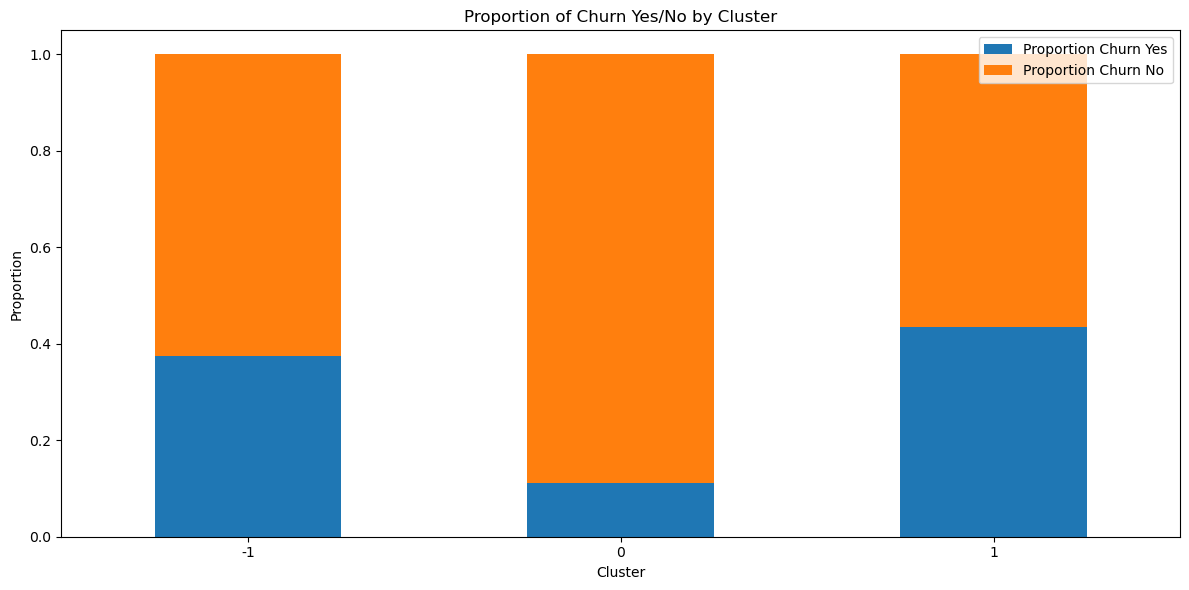

In [44]:
cluster_summary.sort_values("Cluster", inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))

cluster_summary.set_index("Cluster")[["Proportion Churn Yes", "Proportion Churn No"]].plot(
    kind="bar", 
    stacked=True, 
    ax=ax
)

ax.set_ylabel("Proportion")
ax.set_title("Proportion of Churn Yes/No by Cluster")
ax.legend(loc="upper right")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [45]:
for cluster, group in train_encoded.groupby("dbscan_cluster"):
    print(f"Cluster {cluster}:")
    
    for col in group.columns:
        if col not in cols_to_drop:
            mean_val = group[col].mean()
            std_val = group[col].std()
            min_val = group[col].min()
            max_val = group[col].max()
            
            print(f"  {col} summary: mean = {mean_val:.2f}, std = {std_val:.2f}, range = ({min_val:.2f}, {max_val:.2f})")
    
    print("------")

Cluster -1:
  Account length summary: mean = 0.02, std = 1.01, range = (-2.49, 1.80)
  Total day calls summary: mean = -0.61, std = 2.28, range = (-5.02, 2.24)
  Total day charge summary: mean = -0.28, std = 1.73, range = (-3.31, 1.87)
  Total eve calls summary: mean = -0.07, std = 1.68, range = (-4.96, 2.13)
  Total eve charge summary: mean = -0.41, std = 1.94, range = (-3.93, 3.20)
  Total night calls summary: mean = -0.31, std = 1.16, range = (-2.99, 1.54)
  Total night charge summary: mean = -0.37, std = 1.30, range = (-2.43, 1.85)
  Total intl calls summary: mean = 1.23, std = 2.51, range = (-1.82, 6.33)
  Total intl charge summary: mean = -0.08, std = 1.46, range = (-3.67, 2.39)
  Customer service calls summary: mean = 0.52, std = 1.86, range = (-1.19, 5.67)
  International plan_Yes summary: mean = 1.32, std = 1.71, range = (-0.34, 2.98)
  Voice mail plan_Yes summary: mean = 0.08, std = 1.07, range = (-0.62, 1.62)
------
Cluster 0:
  Account length summary: mean = -0.01, std = 1.

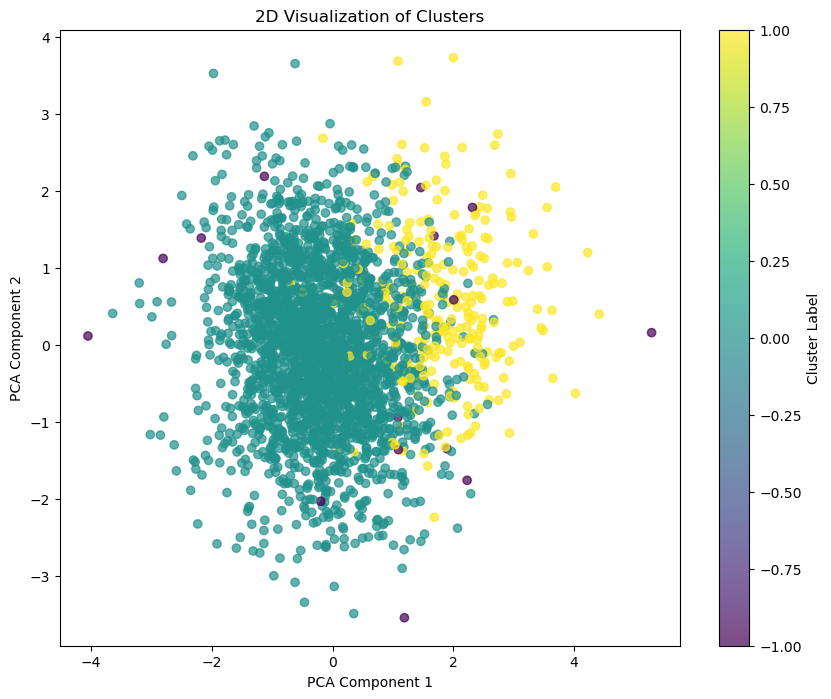

In [46]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_labels, cmap="viridis", alpha=0.7)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of Clusters")
plt.colorbar(scatter, label="Cluster Label")
plt.show()